In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('figure', figsize=(10, 5))
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
votes_2020= pd.read_csv('/content/drive/MyDrive/CP project/Project/Cleaned Datasets/elections 2020')
votes_2020.drop(columns=["Unnamed: 0"],inplace=True)
votes_2020
votes_2020.loc[8, 'State'] = "District of Columbia"
votes_2020

,Year,State,State Initials,Democratic,Libertarian,Other,Republican,Region,Winner
0,2020,Alabama,AL,849624,25176,7312,1441170,South,Republican
1,2020,Alaska,AK,153778,8897,6904,189951,West,Republican
2,2020,Arizona,AZ,1672143,51465,2032,1661686,West,Democratic
3,2020,Arkansas,AR,423932,13133,21357,760647,South,Republican
4,2020,California,CA,11110250,187895,196307,6006429,West,Democratic
5,2020,Colorado,CO,1804352,52460,58561,1364607,West,Democratic
6,2020,Connecticut,CT,1080831,20230,8079,714717,Northeast,Democratic
7,2020,Delaware,DE,296268,5000,2475,200603,South,Democratic
8,2020,District of Columbia,DC,317323,2036,6411,18586,South,Democratic
9,2020,Florida,FL,5297045,70324,31356,5668731,South,Republican


In [4]:
unemp=pd.read_excel('/content/drive/MyDrive/CP project/Project/Raw Datasets/Unemployment.xlsx', sheet_name="UnemploymentMedianIncome")
unemp_2020=unemp[["FIPS_Code","State","Area_Name","Civilian_labor_force_2020", "Employed_2020", "Unemployed_2020", "Unemployment_rate_2020"]]
unemp_2020.rename(columns={"FIPS_Code": "FIPS Code", "Area_Name": "County", "Civilian_labor_force_2020": "Civilian labor force", "Employed_2020": "Employed", "Unemployed_2020":"Unemployed", "Unemployment_rate_2020" : "Unemployment rate"}, inplace=True)
unemp_2020

<ipython-input-4-21599a429067>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unemp_2020.rename(columns={"FIPS_Code": "FIPS Code", "Area_Name": "County", "Civilian_labor_force_2020": "Civilian labor force", "Employed_2020": "Employed", "Unemployed_2020":"Unemployed", "Unemployment_rate_2020" : "Unemployment rate"}, inplace=True)


,FIPS Code,State,County,Civilian labor force,Employed,Unemployed,Unemployment rate
0,0,US,United States,161483724.0,148453335.0,13030389.0,8.1
1,1000,AL,Alabama,2269672.0,2124409.0,145263.0,6.4
2,1001,AL,"Autauga County, AL",26425.0,25023.0,1402.0,5.3
3,1003,AL,"Baldwin County, AL",98979.0,92893.0,6086.0,6.1
4,1005,AL,"Barbour County, AL",8684.0,8017.0,667.0,7.7
...,...,...,...,...,...,...,...
3272,72145,PR,"Vega Baja Municipio, PR",NaN,NaN,NaN,NaN
3273,72147,PR,"Vieques Municipio, PR",NaN,NaN,NaN,NaN
3274,72149,PR,"Villalba Municipio, PR",NaN,NaN,NaN,NaN
3275,72151,PR,"Yabucoa Municipio, PR",NaN,NaN,NaN,NaN


In [5]:
state_names= votes_2020["State"]
state_names_set= set(state_names)
state_names_set
unemp_filtered = unemp_2020[unemp_2020['County'].isin(state_names_set)]
unemp_filtered.rename(columns={"State": "State abb", "County": "State", "FIPS Code": "STATEFP"}, inplace=True)
unemp_filtered.drop(334, axis=0, inplace=True)
unemp_filtered

<ipython-input-5-af5953a43a0d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unemp_filtered.rename(columns={"State": "State abb", "County": "State", "FIPS Code": "STATEFP"}, inplace=True)
<ipython-input-5-af5953a43a0d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unemp_filtered.drop(334, axis=0, inplace=True)


,STATEFP,State abb,State,Civilian labor force,Employed,Unemployed,Unemployment rate
1,1000,AL,Alabama,2269672.0,2124409.0,145263.0,6.4
69,2000,AK,Alaska,347150.0,318298.0,28852.0,8.3
104,4000,AZ,Arizona,3471038.0,3199851.0,271187.0,7.8
120,5000,AR,Arkansas,1346789.0,1263623.0,83166.0,6.2
196,6000,CA,California,18971560.0,17047569.0,1923991.0,10.1
255,8000,CO,Colorado,3088995.0,2880227.0,208768.0,6.8
320,9000,CT,Connecticut,1884099.0,1734478.0,149621.0,7.9
329,10000,DE,Delaware,486497.0,449965.0,36532.0,7.5
333,11000,DC,District of Columbia,386296.0,355788.0,30508.0,7.9
335,12000,FL,Florida,10113733.0,9292632.0,821101.0,8.1


In [6]:
unemp_election= pd.merge(unemp_filtered,votes_2020, how="right", on= "State")
unemp_election.drop_duplicates
unemp_election

,STATEFP,State abb,State,Civilian labor force,Employed,Unemployed,Unemployment rate,Year,State Initials,Democratic,Libertarian,Other,Republican,Region,Winner
0,1000,AL,Alabama,2269672.0,2124409.0,145263.0,6.4,2020,AL,849624,25176,7312,1441170,South,Republican
1,2000,AK,Alaska,347150.0,318298.0,28852.0,8.3,2020,AK,153778,8897,6904,189951,West,Republican
2,4000,AZ,Arizona,3471038.0,3199851.0,271187.0,7.8,2020,AZ,1672143,51465,2032,1661686,West,Democratic
3,5000,AR,Arkansas,1346789.0,1263623.0,83166.0,6.2,2020,AR,423932,13133,21357,760647,South,Republican
4,6000,CA,California,18971560.0,17047569.0,1923991.0,10.1,2020,CA,11110250,187895,196307,6006429,West,Democratic
5,8000,CO,Colorado,3088995.0,2880227.0,208768.0,6.8,2020,CO,1804352,52460,58561,1364607,West,Democratic
6,9000,CT,Connecticut,1884099.0,1734478.0,149621.0,7.9,2020,CT,1080831,20230,8079,714717,Northeast,Democratic
7,10000,DE,Delaware,486497.0,449965.0,36532.0,7.5,2020,DE,296268,5000,2475,200603,South,Democratic
8,11000,DC,District of Columbia,386296.0,355788.0,30508.0,7.9,2020,DC,317323,2036,6411,18586,South,Democratic
9,12000,FL,Florida,10113733.0,9292632.0,821101.0,8.1,2020,FL,5297045,70324,31356,5668731,South,Republican


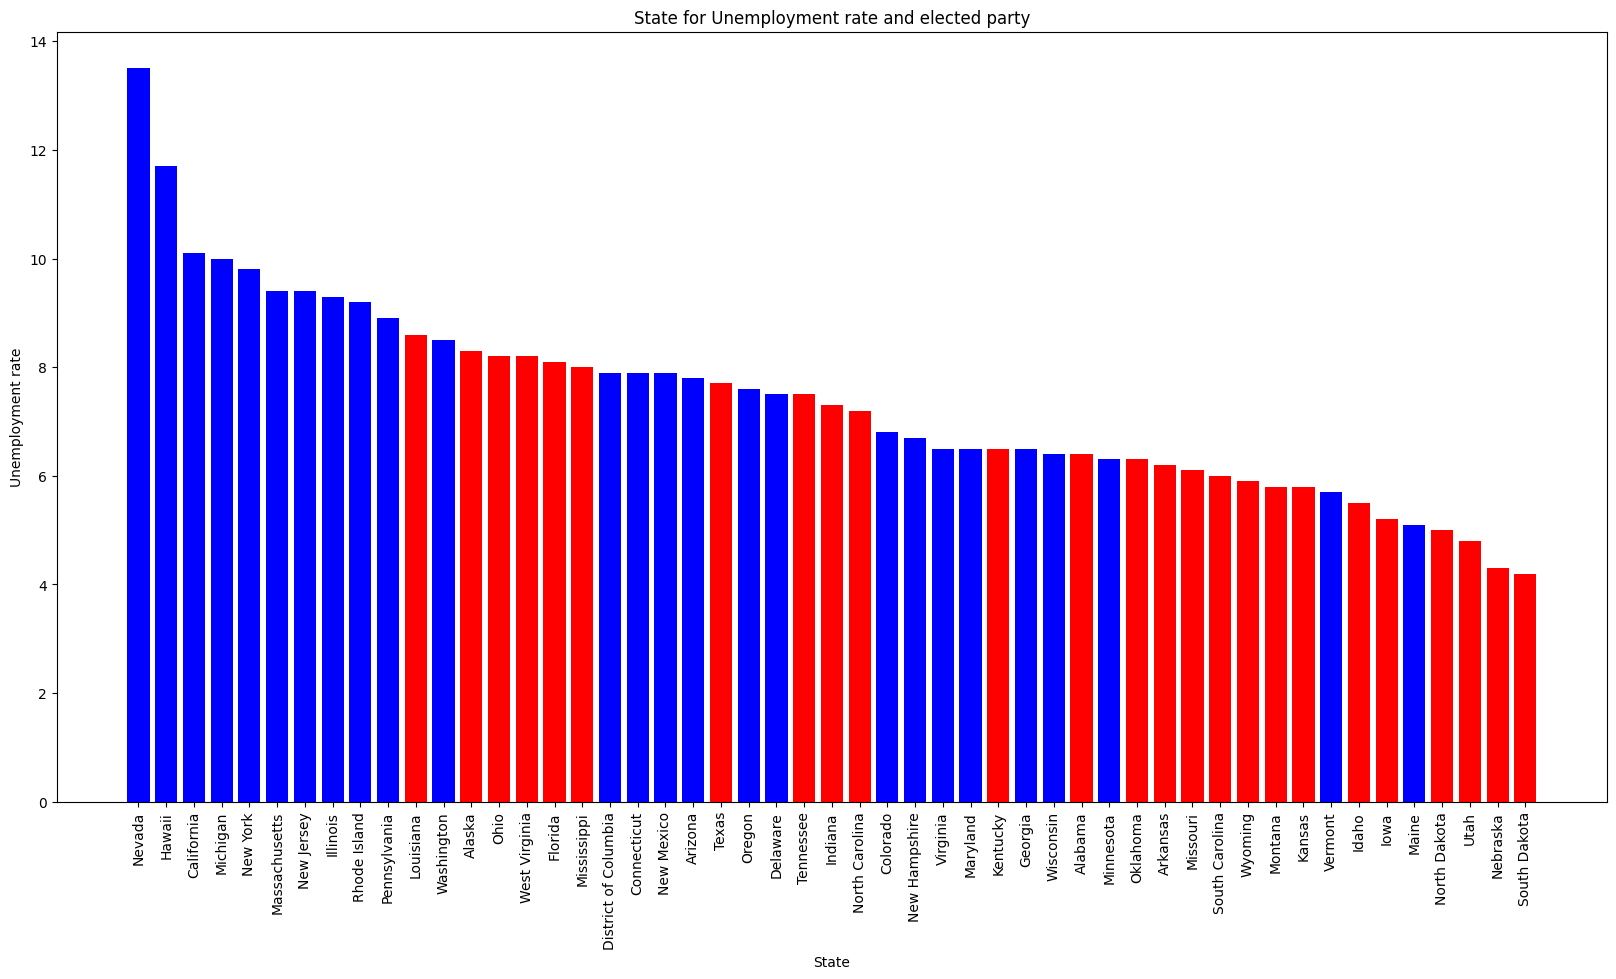

In [7]:
parties=["Democratic",	"Libertarian"	,"Other",	"Republican"]
unemp_election["Winner"]=unemp_election[parties].idxmax(axis=1)


party_color_map = {
    'Republican': 'red',
    'Democratic': 'blue',
    'Libertarian': 'green',
    'Other': 'grey'
}

unemp_election['colour'] = unemp_election['Winner'].map(party_color_map)
unemp_election_sorted=unemp_election.sort_values(by="Unemployment rate", ascending=False)


plt.figure(figsize=(20,10))
plt.bar(unemp_election_sorted['State'], unemp_election_sorted['Unemployment rate'],color=unemp_election_sorted["colour"])
plt.title('State for Unemployment rate and elected party')
plt.xlabel('State')
plt.xticks(rotation=90)
plt.ylabel('Unemployment rate')
plt.show()

In [8]:
unemp_election_sorted

,STATEFP,State abb,State,Civilian labor force,Employed,Unemployed,Unemployment rate,Year,State Initials,Democratic,Libertarian,Other,Republican,Region,Winner,colour
28,32000,NV,Nevada,1506631.0,1302990.0,203641.0,13.5,2020,NV,703486,14783,17217,669890,West,Democratic,blue
11,15000,HI,Hawaii,664085.0,586179.0,77906.0,11.7,2020,HI,366130,5539,11251,196864,West,Democratic,blue
4,6000,CA,California,18971560.0,17047569.0,1923991.0,10.1,2020,CA,11110250,187895,196307,6006429,West,Democratic,blue
22,26000,MI,Michigan,4863008.0,4379122.0,483886.0,10.0,2020,MI,2804040,60381,25029,2649852,Midwest,Democratic,blue
32,36000,NY,New York,9580847.0,8645489.0,935358.0,9.8,2020,NY,5230985,60234,125718,3244798,Northeast,Democratic,blue
21,25000,MA,Massachusetts,3750155.0,3399381.0,350774.0,9.4,2020,MA,2382202,47013,61588,1167202,Northeast,Democratic,blue
30,34000,NJ,New Jersey,4650326.0,4212389.0,437937.0,9.4,2020,NJ,2608335,31677,26067,1883274,Northeast,Democratic,blue
13,17000,IL,Illinois,6349816.0,5759004.0,590812.0,9.3,2020,IL,3471915,66544,48393,2446891,Midwest,Democratic,blue
39,44000,RI,Rhode Island,570185.0,517949.0,52236.0,9.2,2020,RI,307486,5053,4529,199922,Northeast,Democratic,blue
38,42000,PA,Pennsylvania,6514565.0,5933182.0,581383.0,8.9,2020,PA,3458229,79380,0,3377674,Northeast,Democratic,blue


In [9]:
import plotly.express as px

fig = px.choropleth(unemp_election,
                    locations="State abb",
                    locationmode="USA-states",
                    color="Winner",
                    scope="usa",
                    color_discrete_map=party_color_map,
                    title="USA and winning party")

for i, row in unemp_election.iterrows():
    fig.add_scattergeo(
        locations=[row['State abb']],
        locationmode="USA-states",
        text=f"{row['Unemployment rate']:.2f}%",
        mode="text",
        textfont=dict(size=10, color="black"),        showlegend=False)

fig.show()

In [ ]:
unemp_long = pd.melt(unemp_election[['State','Democratic','Libertarian','Other','Republican']], id_vars='State', var_name='Party', value_name='Votes')
unemp_long
p_state_party = unemp_long.pivot_table(index=['State', 'Party'], values='Votes', aggfunc='sum')
p_state_party.head(5)
styled_table = p_state_party.style.background_gradient(axis=None)#, low=0.25, high=1.0)
styled_table

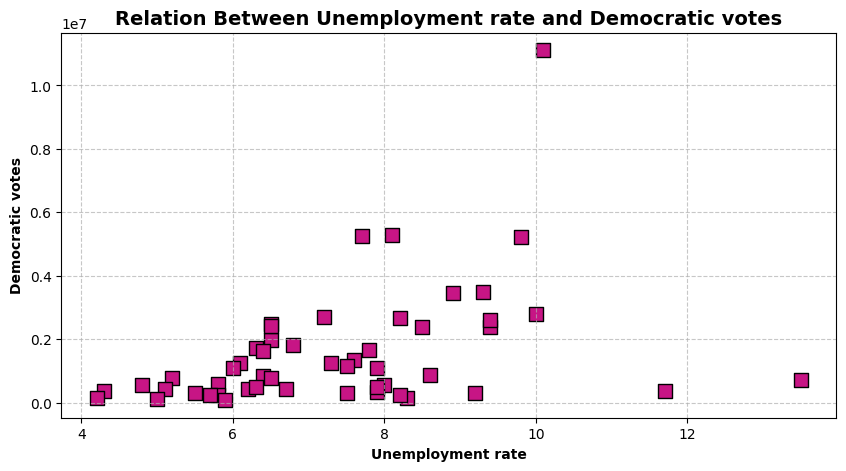

In [ ]:
ax=plt.scatter(unemp_election["Unemployment rate"],unemp_election["Democratic"], marker="s",color="mediumvioletred",edgecolor="black", s=100)
plt.xlabel("Unemployment rate", fontsize=10, fontweight="bold")
plt.ylabel("Democratic votes", fontsize=10, fontweight="bold")
plt.grid(True, linestyle="--", alpha=0.7)
plt.title("Relation Between Unemployment rate and Democratic votes", fontsize=14, fontweight="bold")
plt.show()

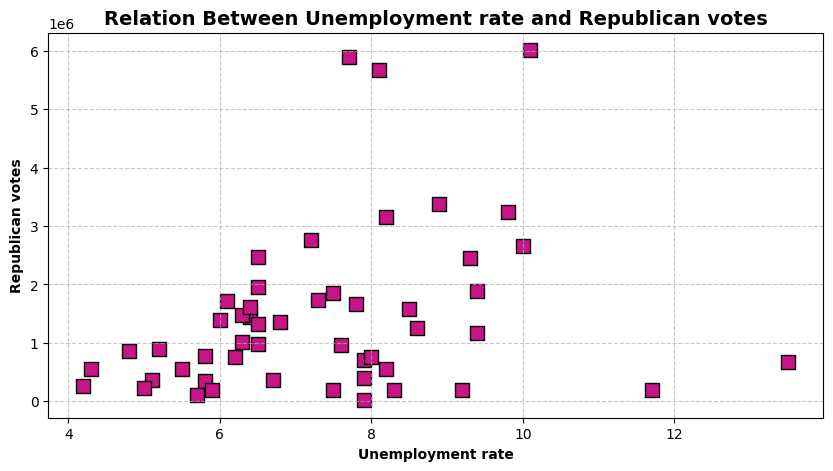

In [ ]:
ax=plt.scatter(unemp_election["Unemployment rate"],unemp_election["Republican"], marker="s",color="mediumvioletred",edgecolor="black", s=100)
plt.xlabel("Unemployment rate", fontsize=10, fontweight="bold")
plt.ylabel("Republican votes", fontsize=10, fontweight="bold")
plt.grid(True, linestyle="--", alpha=0.7)
plt.title("Relation Between Unemployment rate and Republican votes", fontsize=14, fontweight="bold")
plt.show()

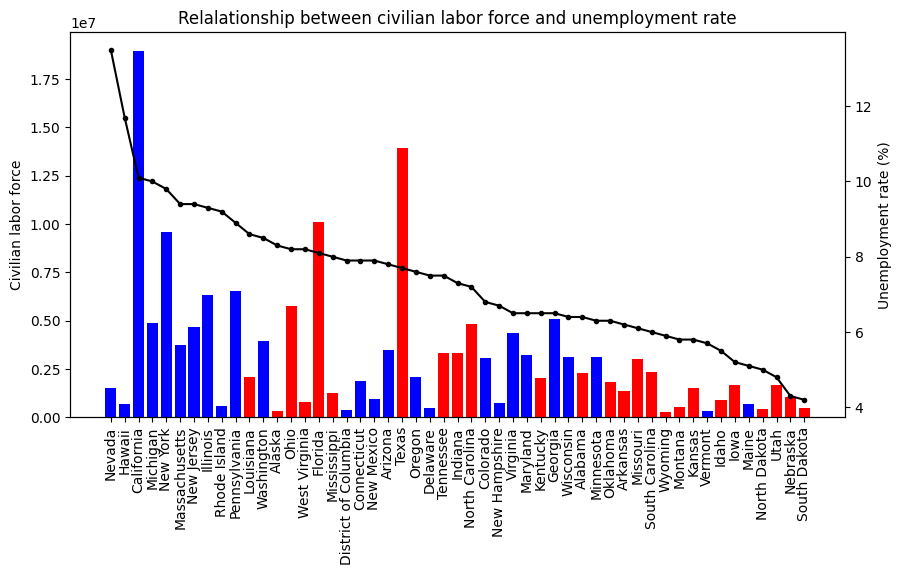

In [ ]:
fig, ax1 = plt.subplots()


ax1.bar(unemp_election_sorted['State'], unemp_election_sorted["Civilian labor force"], color=unemp_election_sorted["colour"], label='Civilian labor force')
ax1.set_ylabel('Civilian labor force')
ax1.tick_params(axis='x', rotation=90)


ax2 = ax1.twinx()
ax2.plot(unemp_election_sorted['State'], unemp_election_sorted['Unemployment rate'], color='black',marker=".", label='Unemployment rate')
ax2.set_ylabel('Unemployment rate (%)')


plt.title('Relationship between civilian labor force and unemployment rate')
plt.show()


<Axes: title={'center': 'State and party elected'}, xlabel='State'>

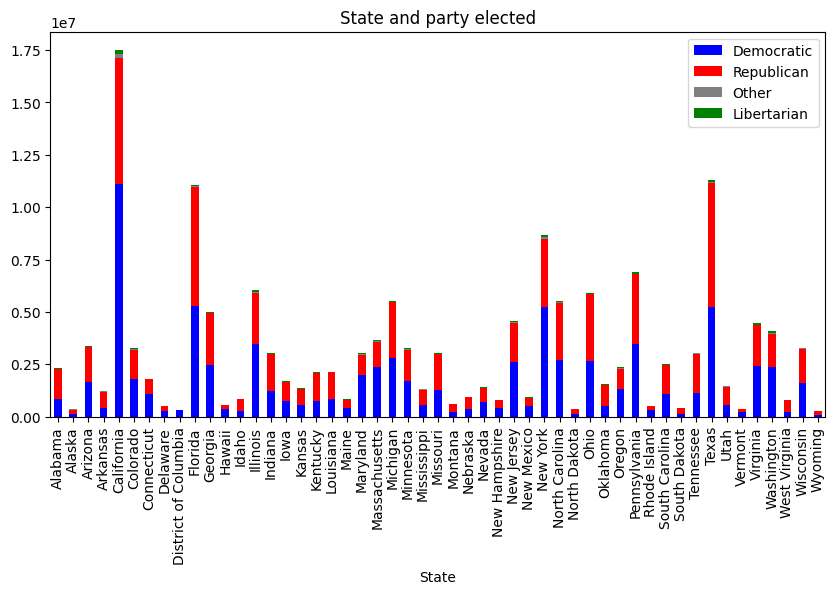

In [ ]:
#STACKED PLOT --> not related to unemployed data, maybe we can put it in the election analysis

ax= unemp_election.plot(x='State', y=["Democratic", "Republican", "Other", "Libertarian"], kind='bar', stacked=True,
        title='State and party elected', color=party_color_map)
ax

In [ ]:
un_region=unemp_election.groupby("Region")["Unemployment rate"].mean()
state_votes = unemp_election.groupby('Region')[["Democratic", "Republican", "Other", "Libertarian"]].sum().reset_index()

state_votes['Most elected Party '] = state_votes.iloc[:, 1:].idxmax(axis=1)
state_votes
party_unempl= pd.merge(state_votes,un_region, how='right', on='Region')
party_unempl.drop(columns=["Democratic"	,"Republican"	,"Other"	,"Libertarian"], inplace=True)
party_unempl_sorted=party_unempl.sort_values(by="Unemployment rate")
party_unempl_sorted

,Region,Most elected Party,Unemployment rate
0,Midwest,Republican,6.508333
2,South,Republican,7.152941
1,Northeast,Democratic,8.011111
3,West,Democratic,8.015385
